# I. Importing the datasets to Python

In [1]:
#for cleaning and pre-processing data
import pandas as pd
import numpy as np

#to read json
import json

#to convert iso duration to seconds
import isodate

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for sentiment analysis
from textblob import TextBlob

#for keyword analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

#for word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
YT_df = pd.read_excel('YT_Data_Collected.xlsx')

In [3]:
YT_df.head(10)

,video_id,title,description,upload_date,duration,category_id,view_count,like_count,comment_count,video_status,definition,average_view_duration,subscribers_gained,subscribers_lost
0,mrf4zoEucME,types of Rank Pushers in CODM,#codm #shorts,2021-05-28T06:02:46Z,PT59S,20,541263,21352,1749,public,hd,48,958,131
1,W_PEo0cOrK0,Evolution of COD Games on Mobile,#codm #shorts,2021-11-08T09:42:38Z,PT38S,20,13674,707,126,public,hd,32,36,6
2,nofGNDtBuc8,Invisibility Glitch and its Counter (CODM),#codm #codmobile #shorts,2021-03-16T07:29:08Z,PT58S,20,756,55,19,public,hd,37,1,1
3,8URFgkpgoBQ,MOST annoying thing in CODM right now,NaN,2023-02-06T11:06:13Z,PT57S,20,1909,94,29,public,hd,40,5,3
4,XgrRqFOXn8c,and you thought you were having a bad day,#codm #shorts,2021-05-26T06:12:09Z,PT37S,20,28264,2031,175,public,hd,31,59,10
5,opLhefVoY8g,PRO player uses FAN LOADOUT in GARENA WC?,#codm #shorts,2021-10-08T03:22:15Z,PT34S,20,20076,914,108,public,hd,30,90,14
6,3qFiiYh_iQ0,Type 25 Meta: 2019 vs 2021,#codm #shorts,2021-11-19T10:16:09Z,PT34S,20,31440,1459,285,public,hd,28,49,13
7,U92nIWugB3w,CODM is giving us FREE Lucky Draw Spin?,#codm #shorts,2021-11-26T00:32:54Z,PT35S,20,18302,653,403,public,hd,23,42,12
8,L2Lzp291-ak,explain this hunter killer drone,#codm #shorts,2021-05-12T08:38:40Z,PT18S,20,33325,1324,110,public,hd,16,97,6
9,nyPOsbvx1nA,this QQ9 gunsmith turns it into an AR,#codm #codmobile #callofdutymobile,2021-03-19T11:45:27Z,PT1M47S,20,806,62,20,public,hd,43,1,0


In [4]:
def load_channel_statistics_from_json(filename='channel_statistics.json'):
    #Loading the channel statistics from a JSON file
    with open(filename, 'r') as file:
        statistics = json.load(file)
    return statistics

channel_statistics = load_channel_statistics_from_json()

#Accessing the channel data
subscriber_count = channel_statistics['subscriber_count']
total_views = channel_statistics['total_views']
print("Total Subscribers of the Channel:", subscriber_count)
print("Total Views of the Channel:", total_views)

Total Subscribers of the Channel: 27800
Total Views of the Channel: 9802298


In [5]:
comments_df = pd.read_excel('Comments_Data_Collected.xlsx')

In [6]:
comments_df.head(10)

,video_id,comments
0,mrf4zoEucME,"['I wonder which one you are…', '😂😂❤', 'Hi', '..."
1,W_PEo0cOrK0,"['CALL OF DUTY GHOST XBOX 360, Call of duty Mo..."
2,nofGNDtBuc8,['Bro I just played with u in shipment\nIm ban...
3,8URFgkpgoBQ,['the moment I saw the feed I already knew wha...
4,XgrRqFOXn8c,"['0:22 Can anyone else relate to this?', 'Nope..."
5,opLhefVoY8g,"['Hit 2000 members on discord, join up if you’..."
6,3qFiiYh_iQ0,"['Ok this was awesome', ""Type 25 meta this sea..."
7,U92nIWugB3w,['Like this video and subscribe for extra good...
8,L2Lzp291-ak,"[""Activison: It's an explosive kamikaze drone ..."
9,nyPOsbvx1nA,"['Qq9 suppressed sound is oddly satisfying 🤣',..."


# II. Data Cleaning

#### 1.1 Checking if there's any missing values for all columns:

In [7]:
missing_value = YT_df.isnull().sum()
print(missing_value)

video_id                  0
title                     0
description              31
upload_date               0
duration                  0
category_id               0
view_count                0
like_count                0
comment_count             0
video_status              0
definition                0
average_view_duration     0
subscribers_gained        0
subscribers_lost          0
dtype: int64


From the above, we see there are missing data in description. Placing a string "Empty" for the missing values. 

In [8]:
YT_df['description'].fillna("Empty", inplace=True)

In [9]:
missing_value = YT_df.isnull().sum()
print(missing_value)

video_id                 0
title                    0
description              0
upload_date              0
duration                 0
category_id              0
view_count               0
like_count               0
comment_count            0
video_status             0
definition               0
average_view_duration    0
subscribers_gained       0
subscribers_lost         0
dtype: int64


#### NOTE: Checking the categorical data

In [10]:
print(YT_df['category_id'].unique())

[20 24]


Category 20 is Gaming Category in YouTube which the channel is based of, since it's a gaming channel this makes sense. But Category 24 is the Comedy Category where some funny gaming videos might have been tagged as comedy, so this doesn't contribute to any valuable insight. Hence will drop this column. 

In [11]:
YT_df = YT_df.drop(columns=['category_id'])

In [12]:
print(YT_df['definition'].unique())

['hd' 'sd']


In [13]:
print(YT_df['video_status'].unique())

['public']


The YouTube API doesn't provide the other Video_Status of the videos - such as private or unlisted, so the video_status column can be dropped since all videos are public.

In [14]:
YT_df = YT_df.drop(columns=['video_status'])

#### 1.2 Checking the data types of all the columns and converting to relevant data types and formats

In [15]:
YT_df.dtypes

video_id                 object
title                    object
description              object
upload_date              object
duration                 object
view_count                int64
like_count                int64
comment_count            object
definition               object
average_view_duration     int64
subscribers_gained        int64
subscribers_lost          int64
dtype: object

In [16]:
#Converting upload_date to datetime
YT_df['upload_date'] = pd.to_datetime(YT_df['upload_date'])

In [17]:
#Converting Comment count to int - but there are some non-numeric value "Not Available"

#Replacing non-numeric values with NaN
YT_df['comment_count'] = pd.to_numeric(YT_df['comment_count'], errors='coerce')
#Filling NaN values with 0
YT_df['comment_count'] = YT_df['comment_count'].fillna(0)

#Converting to int
YT_df['comment_count'] = YT_df['comment_count'].astype(int)

Noticed that the duration column seems to be in ISO 8601 duration format hence using Python's isodate library and converting it into total seconds for easier analysis.  

In [18]:
def parse_duration(duration):
    return isodate.parse_duration(duration).total_seconds()

YT_df['duration'] = YT_df['duration'].apply(parse_duration)

In [19]:
YT_df['duration'] = YT_df['duration'].astype(int)

In [20]:
YT_df.dtypes

video_id                              object
title                                 object
description                           object
upload_date              datetime64[ns, UTC]
duration                               int32
view_count                             int64
like_count                             int64
comment_count                          int32
definition                            object
average_view_duration                  int64
subscribers_gained                     int64
subscribers_lost                       int64
dtype: object

In [21]:
YT_df

,video_id,title,description,upload_date,duration,view_count,like_count,comment_count,definition,average_view_duration,subscribers_gained,subscribers_lost
0,mrf4zoEucME,types of Rank Pushers in CODM,#codm #shorts,2021-05-28 06:02:46+00:00,59,541263,21352,1749,hd,48,958,131
1,W_PEo0cOrK0,Evolution of COD Games on Mobile,#codm #shorts,2021-11-08 09:42:38+00:00,38,13674,707,126,hd,32,36,6
2,nofGNDtBuc8,Invisibility Glitch and its Counter (CODM),#codm #codmobile #shorts,2021-03-16 07:29:08+00:00,58,756,55,19,hd,37,1,1
3,8URFgkpgoBQ,MOST annoying thing in CODM right now,Empty,2023-02-06 11:06:13+00:00,57,1909,94,29,hd,40,5,3
4,XgrRqFOXn8c,and you thought you were having a bad day,#codm #shorts,2021-05-26 06:12:09+00:00,37,28264,2031,175,hd,31,59,10
...,...,...,...,...,...,...,...,...,...,...,...,...
304,CTk9MymqDSM,3 Most RAREST Emotes I Own In CODM,#codm #shorts,2021-11-30 04:17:25+00:00,33,13162,607,164,hd,23,23,6
305,jwJ1-gNjTUg,THIS AK117 BUILD HELPED ME NUKE TRYHARDS?,#codm #callofdutymobile #codmobile,2021-02-08 07:10:01+00:00,166,893,70,20,hd,59,5,1
306,NoXiOYgbJOg,where can I get this gaming chair?,#codm #shorts,2021-05-24 08:55:51+00:00,49,63894,2587,391,hd,38,109,15
307,1N9dvdJkDs0,CODM | Legendary Ranked Nuke (40-0) | No Stress,Empty,2020-07-06 04:34:34+00:00,261,644,46,11,hd,86,3,0


#### 1.3 Checking if there are any duplicate rows 

In [22]:
YT_df.shape

(309, 12)

In [23]:
duplicates = YT_df.duplicated()
YT_df[duplicates]

,video_id,title,description,upload_date,duration,view_count,like_count,comment_count,definition,average_view_duration,subscribers_gained,subscribers_lost
50,L2Lzp291-ak,explain this hunter killer drone,#codm #shorts,2021-05-12 08:38:40+00:00,18,33325,1324,110,hd,16,97,6
61,SXbd7GEreic,evolution of seasonal LEGENDARY FRAMES,#codm #shorts,2021-09-17 05:29:01+00:00,37,15977,648,240,hd,30,18,1
76,k3i0qfuyo1g,top 3 loadouts that will help you reach legend...,#codm #shorts,2021-08-03 09:21:53+00:00,20,14575,917,153,hd,17,62,6
100,OVhUWWy0gf0,when you get the fastest 4K ever? (2s),#shorts #codm,2021-04-27 16:36:55+00:00,7,11558,466,34,hd,7,10,1


In [24]:
YT_df = YT_df.drop_duplicates()

In [25]:
duplicates = YT_df.duplicated()
YT_df[duplicates]

,video_id,title,description,upload_date,duration,view_count,like_count,comment_count,definition,average_view_duration,subscribers_gained,subscribers_lost


In [26]:
YT_df.shape

(305, 12)

#### 1.4 Checking if there are any outliers

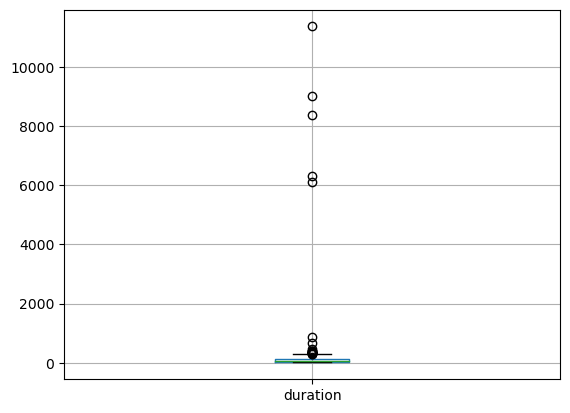

In [27]:
YT_df.boxplot(column=['duration'])
plt.show()

The video length duration (in seconds) as shown above has outliers -> which indicates that the video type is not a normal video but a live video. Hence for our analysis, we will be ignoring the live videos. 

In [28]:
YT_df = YT_df[YT_df['duration'] <= 5000]

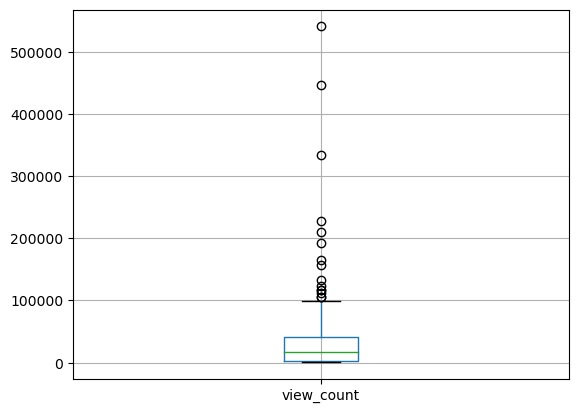

In [29]:
YT_df.boxplot(column=['view_count'])
plt.show()

In [30]:
videos_above_100k_views = YT_df[YT_df['view_count'] > 100000]
len(videos_above_100k_views)

15

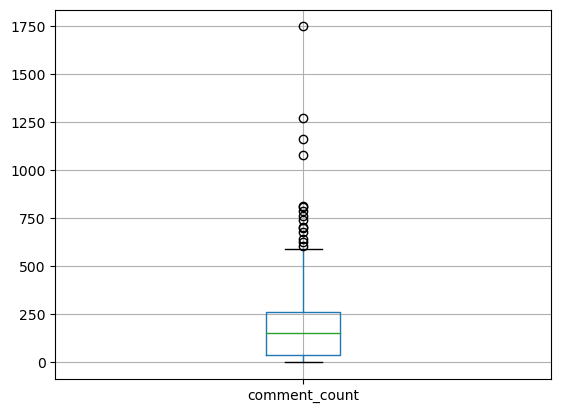

In [31]:
YT_df.boxplot(column=['comment_count'])
plt.show()

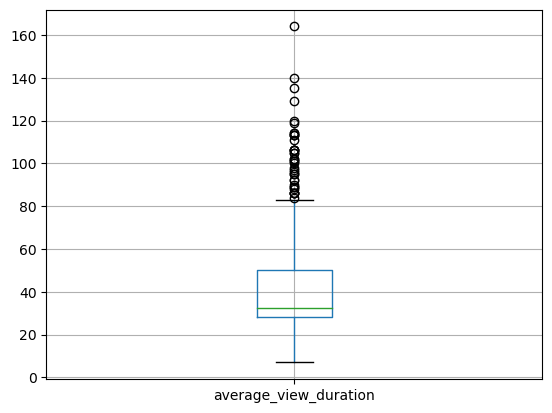

In [32]:
YT_df.boxplot(column=['average_view_duration'])
plt.show()

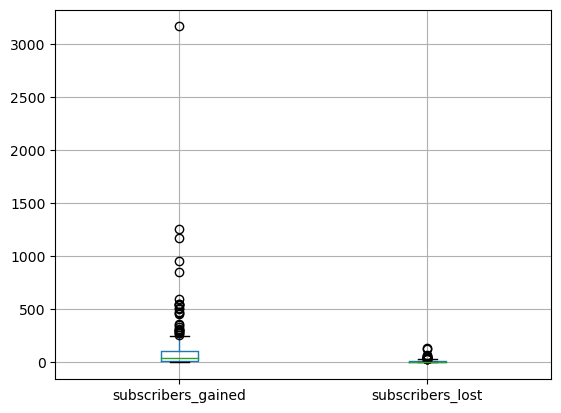

In [33]:
YT_df.boxplot(column=['subscribers_gained','subscribers_lost'])
plt.show()

In [34]:
YT_df.shape

(300, 12)

Since there's only 300 rows of data (300 videos uploaded), not removing any more data (outliers) to capture the essence of the dataset. 

#### 1.5 Checking Data Integrity:

1.5.1 Since we removed some rows of data in YT_df and now to maintain data intergity, let's remove them in the comments_df as well.

In [35]:
missing_value = comments_df.isnull().sum()
print(missing_value)

video_id    0
comments    0
dtype: int64


In [36]:
print(comments_df['video_id'].duplicated().sum())

4


In [37]:
comments_df = comments_df.drop_duplicates(subset='video_id')

In [38]:
comments_df = comments_df[comments_df['video_id'].isin(YT_df['video_id'])]

In [39]:
print(comments_df.shape)
print(YT_df.shape)

(299, 2)
(300, 12)


The one discrepancy is that one video has comment's off, so it's fine. 

1.5.2 Checking for negative values for duration, view_count, like_count, average_view_duration, subscribers_gained, subscribers_lost and removing them if found. 

In [40]:
negative_duration = (YT_df['duration'] < 0).any()
negative_view_count = (YT_df['view_count'] < 0).any()
negative_like_count = (YT_df['like_count'] < 0).any()
negative_average_view_duration = (YT_df['average_view_duration'] < 0).any()
negative_subscribers_gained = (YT_df['subscribers_gained'] < 0).any()
negative_subscribers_lost = (YT_df['subscribers_lost'] < 0).any()

print("Negative values in duration:", negative_duration)
print("Negative values in view_count:", negative_view_count)
print("Negative values in like_count:", negative_like_count)
print("Negative values in average_view_duration:", negative_average_view_duration)
print("Negative values in subscribers_gained:", negative_subscribers_gained)
print("Negative values in subscribers_lost:", negative_subscribers_lost)

Negative values in duration: False
Negative values in view_count: False
Negative values in like_count: False
Negative values in average_view_duration: False
Negative values in subscribers_gained: False
Negative values in subscribers_lost: False


# III. New Features for Analysis

### Time of Upload 

In [41]:
YT_df['upload_hour'] = YT_df['upload_date'].dt.hour
YT_df['upload_day'] = YT_df['upload_date'].dt.day
YT_df['upload_month'] = YT_df['upload_date'].dt.month
YT_df['upload_year'] = YT_df['upload_date'].dt.year
YT_df['day_of_week'] = YT_df['upload_date'].dt.dayofweek
YT_df['is_weekend'] = YT_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

### Video Length Category (Short, Medium, Long)

In [42]:
#0-60s is short length, 60-300s is medium length, 300s+ is long length
YT_df['duration_category'] = pd.cut(YT_df['duration'], bins=[0, 60, 300, float('inf')], labels=['short', 'medium', 'long'])

### Engagement Ratio (Likes to views, comments to views, likes to comments)

In [43]:
YT_df['likes_to_views_ratio'] = YT_df['like_count'] / YT_df['view_count']
YT_df['comments_to_views_ratio'] = YT_df['comment_count'] / YT_df['view_count']
YT_df['likes_to_comments_ratio'] = YT_df['like_count'] / YT_df['comment_count']

### Net Subscriber Gain per video

In [44]:
YT_df['net_subscribers_gained'] = YT_df['subscribers_gained'] - YT_df['subscribers_lost']

### Engagement Score (0-100)

Creating a score based on views, likes and comments of a video where normalization was done and weights were added to give views 65% weight, likes - 25% weight, comments - 10% weight. 

In [45]:
max_view_count = YT_df['view_count'].max()
max_like_count = YT_df['like_count'].max()
max_comment_count = YT_df['comment_count'].max()

def calculate_weighted_engagement_score(row):
    normalized_view = (row['view_count'] / max_view_count) * 65 
    normalized_like = (row['like_count'] / max_like_count) * 25  
    normalized_comment = (row['comment_count'] / max_comment_count) * 10   
    return (normalized_view + normalized_like + normalized_comment)

#Applying the function to calculate the new engagement score
YT_df['engagement_score'] = YT_df.apply(calculate_weighted_engagement_score, axis=1)

### Engagement Category

In [46]:
#Keeping top 30% as high engagement videos -> 30-70 split of the data
quantile_threshold = YT_df['engagement_score'].quantile(0.70)
YT_df['engagement_category'] = YT_df['engagement_score'].apply(lambda x: 'High' if x >= quantile_threshold else 'Low')

In [47]:
YT_df

,video_id,title,description,upload_date,duration,view_count,like_count,comment_count,definition,average_view_duration,...,upload_year,day_of_week,is_weekend,duration_category,likes_to_views_ratio,comments_to_views_ratio,likes_to_comments_ratio,net_subscribers_gained,engagement_score,engagement_category
0,mrf4zoEucME,types of Rank Pushers in CODM,#codm #shorts,2021-05-28 06:02:46+00:00,59,541263,21352,1749,hd,48,...,2021,4,0,short,0.039448,0.003231,12.208119,827,100.000000,High
1,W_PEo0cOrK0,Evolution of COD Games on Mobile,#codm #shorts,2021-11-08 09:42:38+00:00,38,13674,707,126,hd,32,...,2021,0,0,short,0.051704,0.009215,5.611111,30,3.190307,Low
2,nofGNDtBuc8,Invisibility Glitch and its Counter (CODM),#codm #codmobile #shorts,2021-03-16 07:29:08+00:00,58,756,55,19,hd,37,...,2021,1,0,short,0.072751,0.025132,2.894737,0,0.263818,Low
3,8URFgkpgoBQ,MOST annoying thing in CODM right now,Empty,2023-02-06 11:06:13+00:00,57,1909,94,29,hd,40,...,2023,0,0,short,0.049240,0.015191,3.241379,2,0.505120,Low
4,XgrRqFOXn8c,and you thought you were having a bad day,#codm #shorts,2021-05-26 06:12:09+00:00,37,28264,2031,175,hd,31,...,2021,2,0,short,0.071858,0.006192,11.605714,49,6.772779,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,CTk9MymqDSM,3 Most RAREST Emotes I Own In CODM,#codm #shorts,2021-11-30 04:17:25+00:00,33,13162,607,164,hd,23,...,2021,1,0,short,0.046118,0.012460,3.701220,17,3.229003,Low
305,jwJ1-gNjTUg,THIS AK117 BUILD HELPED ME NUKE TRYHARDS?,#codm #callofdutymobile #codmobile,2021-02-08 07:10:01+00:00,166,893,70,20,hd,59,...,2021,0,0,medium,0.078387,0.022396,3.500000,4,0.303551,Low
306,NoXiOYgbJOg,where can I get this gaming chair?,#codm #shorts,2021-05-24 08:55:51+00:00,49,63894,2587,391,hd,38,...,2021,0,0,short,0.040489,0.006120,6.616368,94,12.937552,High
307,1N9dvdJkDs0,CODM | Legendary Ranked Nuke (40-0) | No Stress,Empty,2020-07-06 04:34:34+00:00,261,644,46,11,hd,86,...,2020,0,0,medium,0.071429,0.017081,4.181818,3,0.194090,Low


### Video Definition Category (HD=1, SD=0)

In [48]:
YT_df['definition_numeric'] = YT_df['definition'].map({'hd': 1, 'sd': 0})

### Length of Title and Description

In [49]:
YT_df['title_length'] = YT_df['title'].apply(len)
YT_df['description_length'] = YT_df['description'].apply(len)

### Sentiment Analysis (for comments)

Using textblob to analyze the sentiment of the text (positive, negative, neutral) for comments. Comments Subjectivity -> 0: Very objective (factual)
1: Very subjective (opinionated)
and Comments Polarity -> -1: Extremely negative
0: Neutral
1: Extremely positive

In [50]:
#Function to calculate sentiment of aggregated comments
def calculate_sentiment(comment_list):
    # Combine list of comments into a single string
    combined_comments = ' '.join(comment_list)
    try:
        # Calculate sentiment
        return TextBlob(combined_comments).sentiment
    except:
        return None

#Applying the function to the DataFrame
comments_df['comments_sentiment'] = comments_df['comments'].apply(calculate_sentiment)

#Extracting polarity and subjectivity
comments_df['comments_polarity'] = comments_df['comments_sentiment'].apply(lambda x: x[0] if x is not None else None)
comments_df['comments_subjectivity'] = comments_df['comments_sentiment'].apply(lambda x: x[1] if x is not None else None)

### Keyword Analysis (for title and description)

In [51]:
#Function to extract keywords
def extract_keywords(text):
    try:
        words = word_tokenize(text)
        keywords = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
        return keywords
    except:
        return []

#Applying to DataFrame
YT_df['title_keywords'] = YT_df['title'].apply(extract_keywords)
YT_df['description_keywords'] = YT_df['description'].apply(extract_keywords)

In [52]:
YT_df['title_keywords_str'] = YT_df['title_keywords'].apply(lambda x: ' '.join(x))
YT_df['description_keywords_str'] = YT_df['description_keywords'].apply(lambda x: ' '.join(x))

In [53]:
YT_df.dtypes

video_id                                 object
title                                    object
description                              object
upload_date                 datetime64[ns, UTC]
duration                                  int32
view_count                                int64
like_count                                int64
comment_count                             int32
definition                               object
average_view_duration                     int64
subscribers_gained                        int64
subscribers_lost                          int64
upload_hour                               int32
upload_day                                int32
upload_month                              int32
upload_year                               int32
day_of_week                               int32
is_weekend                                int64
duration_category                      category
likes_to_views_ratio                    float64
comments_to_views_ratio                 

In [54]:
missing_value = YT_df.isnull().sum()
print(missing_value)

video_id                    0
title                       0
description                 0
upload_date                 0
duration                    0
view_count                  0
like_count                  0
comment_count               0
definition                  0
average_view_duration       0
subscribers_gained          0
subscribers_lost            0
upload_hour                 0
upload_day                  0
upload_month                0
upload_year                 0
day_of_week                 0
is_weekend                  0
duration_category           0
likes_to_views_ratio        0
comments_to_views_ratio     0
likes_to_comments_ratio     0
net_subscribers_gained      0
engagement_score            0
engagement_category         0
definition_numeric          0
title_length                0
description_length          0
title_keywords              0
description_keywords        0
title_keywords_str          0
description_keywords_str    0
dtype: int64


In [55]:
comments_df

,video_id,comments,comments_sentiment,comments_polarity,comments_subjectivity
0,mrf4zoEucME,"['I wonder which one you are…', '😂😂❤', 'Hi', '...","(-0.4166666666666667, 1.0)",-0.416667,1.0
1,W_PEo0cOrK0,"['CALL OF DUTY GHOST XBOX 360, Call of duty Mo...","(0.0625, 1.0)",0.062500,1.0
2,nofGNDtBuc8,['Bro I just played with u in shipment\nIm ban...,"(-0.75, 1.0)",-0.750000,1.0
3,8URFgkpgoBQ,['the moment I saw the feed I already knew wha...,"(0.0, 0.0)",0.000000,0.0
4,XgrRqFOXn8c,"['0:22 Can anyone else relate to this?', 'Nope...","(0.0625, 1.0)",0.062500,1.0
...,...,...,...,...,...
303,CTk9MymqDSM,['me punching the air right now cuz Garena got...,"(-0.875, 1.0)",-0.875000,1.0
304,jwJ1-gNjTUg,"['Underrated', 'Nice bro came here cause of ca...","(0.0, 0.0)",0.000000,0.0
305,NoXiOYgbJOg,"['Uses PP but has no PP', 'U need to show his ...","(0.0, 0.0)",0.000000,0.0
306,1N9dvdJkDs0,"['I forget to comment ❤️sorry', 'Whatta player...","(0.0, 0.0)",0.000000,0.0


In [56]:
YT_df

,video_id,title,description,upload_date,duration,view_count,like_count,comment_count,definition,average_view_duration,...,net_subscribers_gained,engagement_score,engagement_category,definition_numeric,title_length,description_length,title_keywords,description_keywords,title_keywords_str,description_keywords_str
0,mrf4zoEucME,types of Rank Pushers in CODM,#codm #shorts,2021-05-28 06:02:46+00:00,59,541263,21352,1749,hd,48,...,827,100.000000,High,1,29,13,"[types, Rank, Pushers, CODM]","[codm, shorts]",types Rank Pushers CODM,codm shorts
1,W_PEo0cOrK0,Evolution of COD Games on Mobile,#codm #shorts,2021-11-08 09:42:38+00:00,38,13674,707,126,hd,32,...,30,3.190307,Low,1,32,13,"[Evolution, COD, Games, Mobile]","[codm, shorts]",Evolution COD Games Mobile,codm shorts
2,nofGNDtBuc8,Invisibility Glitch and its Counter (CODM),#codm #codmobile #shorts,2021-03-16 07:29:08+00:00,58,756,55,19,hd,37,...,0,0.263818,Low,1,42,24,"[Invisibility, Glitch, Counter, CODM]","[codm, codmobile, shorts]",Invisibility Glitch Counter CODM,codm codmobile shorts
3,8URFgkpgoBQ,MOST annoying thing in CODM right now,Empty,2023-02-06 11:06:13+00:00,57,1909,94,29,hd,40,...,2,0.505120,Low,1,37,5,"[MOST, annoying, thing, CODM, right]",[Empty],MOST annoying thing CODM right,Empty
4,XgrRqFOXn8c,and you thought you were having a bad day,#codm #shorts,2021-05-26 06:12:09+00:00,37,28264,2031,175,hd,31,...,49,6.772779,Low,1,41,13,"[thought, bad, day]","[codm, shorts]",thought bad day,codm shorts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,CTk9MymqDSM,3 Most RAREST Emotes I Own In CODM,#codm #shorts,2021-11-30 04:17:25+00:00,33,13162,607,164,hd,23,...,17,3.229003,Low,1,34,13,"[Most, RAREST, Emotes, I, Own, In, CODM]","[codm, shorts]",Most RAREST Emotes I Own In CODM,codm shorts
305,jwJ1-gNjTUg,THIS AK117 BUILD HELPED ME NUKE TRYHARDS?,#codm #callofdutymobile #codmobile,2021-02-08 07:10:01+00:00,166,893,70,20,hd,59,...,4,0.303551,Low,1,41,34,"[THIS, BUILD, HELPED, ME, NUKE, TRYHARDS]","[codm, callofdutymobile, codmobile]",THIS BUILD HELPED ME NUKE TRYHARDS,codm callofdutymobile codmobile
306,NoXiOYgbJOg,where can I get this gaming chair?,#codm #shorts,2021-05-24 08:55:51+00:00,49,63894,2587,391,hd,38,...,94,12.937552,High,1,34,13,"[I, get, gaming, chair]","[codm, shorts]",I get gaming chair,codm shorts
307,1N9dvdJkDs0,CODM | Legendary Ranked Nuke (40-0) | No Stress,Empty,2020-07-06 04:34:34+00:00,261,644,46,11,hd,86,...,3,0.194090,Low,1,47,5,"[CODM, Legendary, Ranked, Nuke, No, Stress]",[Empty],CODM Legendary Ranked Nuke No Stress,Empty


# IV. Exploratory Data Analysis

## Engagement Score Distribution

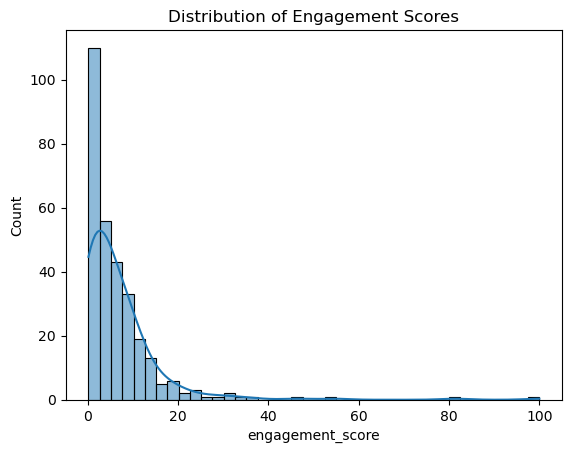

In [57]:
sns.histplot(YT_df['engagement_score'], kde=True)
plt.title('Distribution of Engagement Scores')
plt.show()

#### Insights

The histogram shows us a right-skewed distribution of engagement scores with majority of videos at lower scores, suggesting that most content has low engagement. A small number of videos achieve high engagement. Identifying features of high-performing videos could provide actionable insights to increase overall engagement on the channel.

## Time Series Analysis

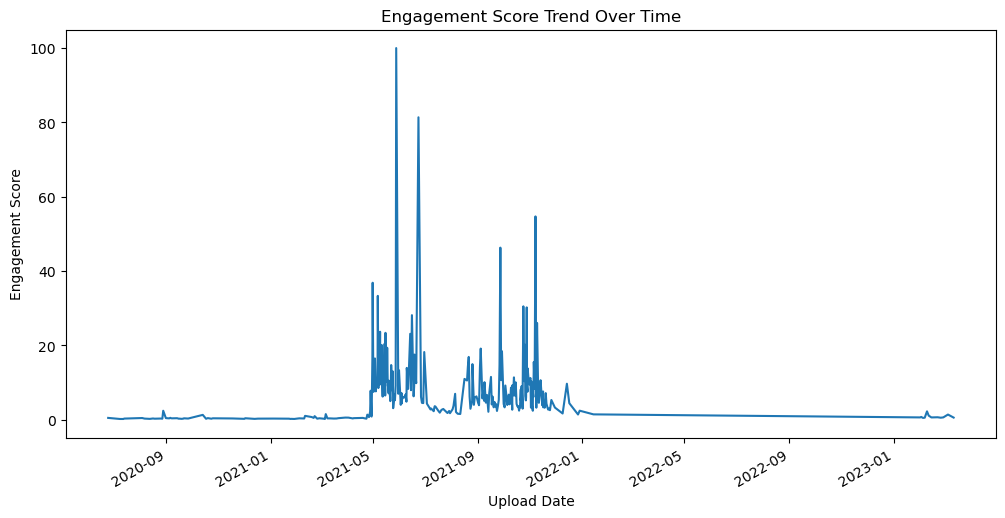

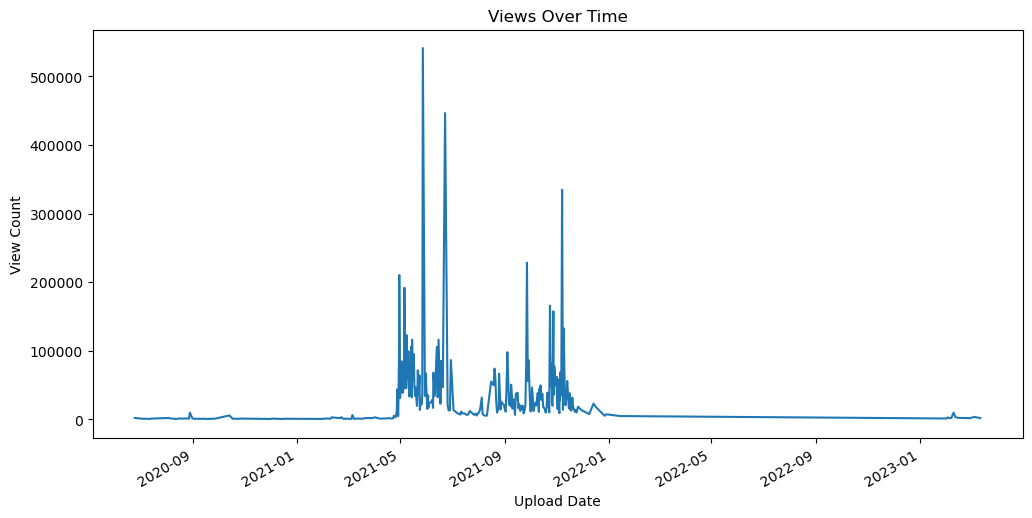

In [58]:
plt.figure(figsize=(12, 6))
YT_df.set_index('upload_date')['engagement_score'].plot()
plt.title('Engagement Score Trend Over Time')
plt.xlabel('Upload Date')
plt.ylabel('Engagement Score')
plt.show()

# Time Series Analysis for Views
plt.figure(figsize=(12, 6))
YT_df.set_index('upload_date')['view_count'].plot()
plt.title('Views Over Time')
plt.xlabel('Upload Date')
plt.ylabel('View Count')
plt.show()

#### Insights

This graph shows us that the channel was active and gaining attention from 05-2021 to 11-2021 and then the channel has been quiet in attracting engagers since then but a little spike in early 2023. Meaning - the channel is at it's revival stage. Once, we gain some insights from this historical data, the channel can be revived. 

## Video Length Analysis

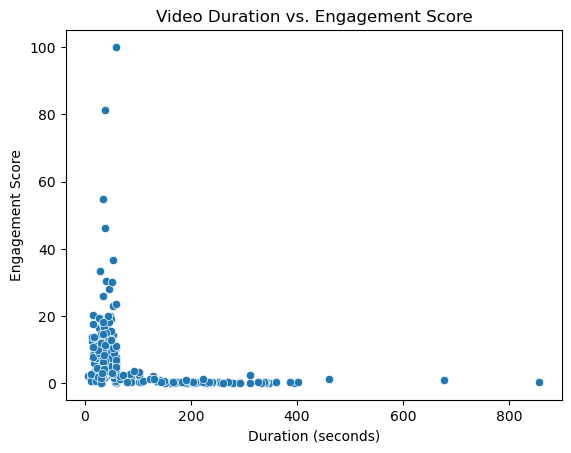

In [59]:
# Scatter Plot for Video Duration vs Engagement Score
sns.scatterplot(x='duration', y='engagement_score', data=YT_df)
plt.title('Video Duration vs. Engagement Score')
plt.xlabel('Duration (seconds)')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

The scatter plot shows us that shorter videos tend to have a wider range of engagement scores, with some achieving very high engagement. So the channel should upload more shorter videos. 

## Comparison of High and Low Engagement Videos

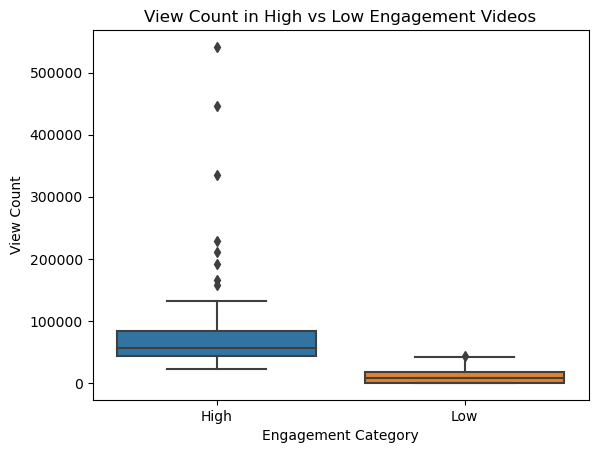

In [60]:
# Boxplot for View Count in High vs Low Engagement Videos
sns.boxplot(x='engagement_category', y='view_count', data=YT_df)
plt.title('View Count in High vs Low Engagement Videos')
plt.xlabel('Engagement Category')
plt.ylabel('View Count')
plt.show()

#### Insights: 

The boxplot shows us that high engagement videos generally have a wider range and higher median view count compared to low engagement videos. Notably, there are several outliers with exceptionally high views in the high engagement category, indicating that a few videos are driving significantly more views than average. This contrast suggests that high engagement is strongly associated with higher viewership.

##  Subscriber Gain/Loss Analysis

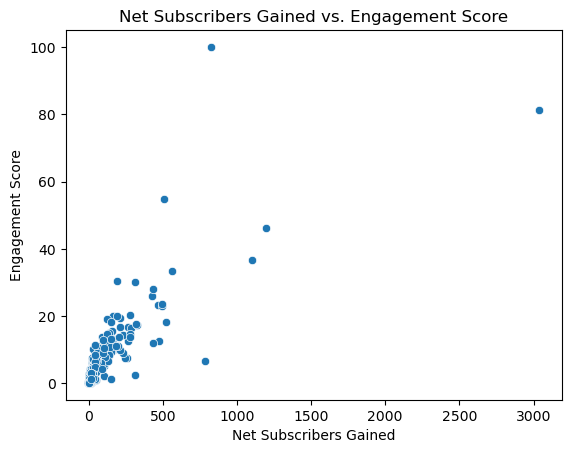

In [61]:
# Scatter Plot for Net Subscribers Gained vs Engagement Score
sns.scatterplot(x='net_subscribers_gained', y='engagement_score', data=YT_df)
plt.title('Net Subscribers Gained vs. Engagement Score')
plt.xlabel('Net Subscribers Gained')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

The scatter plot tells us that there's a positive relationship between the net subscribers gained and engagement scores, with a few videos achieving high engagement and a very high increase in subscribers. However, the majority of videos get moderate engagement and a smaller number of net subscribers. The outliers shows us that the some videos were very effective in bringing subscribers, so need to check on these outliers and understand why they attracted so many viewers. 

## Low and High Engagement Range Intervals (for likes, comments and views)

In [62]:
# Splitting the DataFrame into high and low engagement DataFrames
high_engagement_df = YT_df[YT_df['engagement_category'] == 'High']
low_engagement_df = YT_df[YT_df['engagement_category'] == 'Low']

# Function to calculate the range as an interval (min - max)
def calculate_range_interval(dataframe, column):
    min_value = dataframe[column].min()
    max_value = dataframe[column].max()
    return f"{min_value} - {max_value}"

# Calculating range intervals for view count, comment count, like count, and engagement score in both categories
range_intervals_high_engagement = {
    'view_count_range': calculate_range_interval(high_engagement_df, 'view_count'),
    'comment_count_range': calculate_range_interval(high_engagement_df, 'comment_count'),
    'like_count_range': calculate_range_interval(high_engagement_df, 'like_count'),
    'engagement_score_range': calculate_range_interval(high_engagement_df, 'engagement_score')
}

range_intervals_low_engagement = {
    'view_count_range': calculate_range_interval(low_engagement_df, 'view_count'),
    'comment_count_range': calculate_range_interval(low_engagement_df, 'comment_count'),
    'like_count_range': calculate_range_interval(low_engagement_df, 'like_count'),
    'engagement_score_range': calculate_range_interval(low_engagement_df, 'engagement_score')
}

# Displaying the range intervals
print("Range Intervals for High Engagement Videos:")
for key, value in range_intervals_high_engagement.items():
    print(f"{key}: {value}")

print("\nRange Intervals for Low Engagement Videos:")
for key, value in range_intervals_low_engagement.items():
    print(f"{key}: {value}")

Range Intervals for High Engagement Videos:
view_count_range: 22745 - 541263
comment_count_range: 75 - 1749
like_count_range: 1553 - 21352
engagement_score_range: 7.78370190243864 - 100.0

Range Intervals for Low Engagement Videos:
view_count_range: 323 - 43439
comment_count_range: 0 - 403
like_count_range: 32 - 2408
engagement_score_range: 0.14871950194223083 - 7.7618061575436705


Low Engagement Score range is 0.14 - 7.76. High is 7.7 to 100. 

## Analysis of Upload Time

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15784\868984853.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_name', y='engagement_score', data=YT_df, ci=None, color='lightgreen')


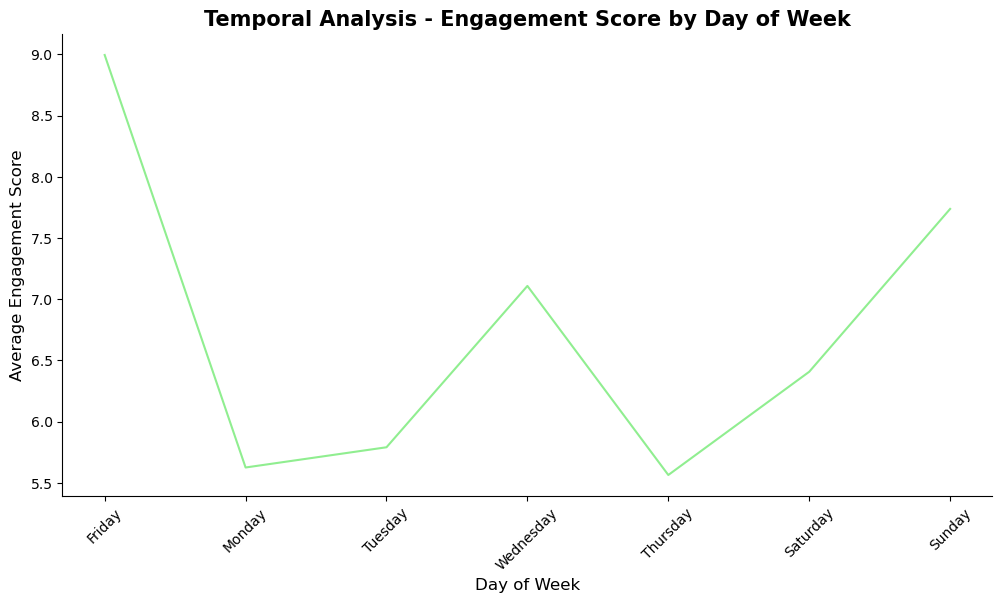

In [63]:
# Mapping numeric day to actual day name
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
YT_df['day_name'] = YT_df['day_of_week'].apply(lambda x: days[x])

# Code for line chart for temporal analysis (Day of Week)
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_name', y='engagement_score', data=YT_df, ci=None, color='lightgreen')
plt.title('Temporal Analysis - Engagement Score by Day of Week', fontsize=15, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate the x-axis labels for better readability
plt.yticks(fontsize=10)
sns.despine()
plt.show()

#### Insights:

Engagement peaks on Sunday and dips mid-week, indicating weekends may be more effective for uploads.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15784\2410872694.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='upload_hour', y='engagement_score', data=YT_df, ci=None, color='skyblue')


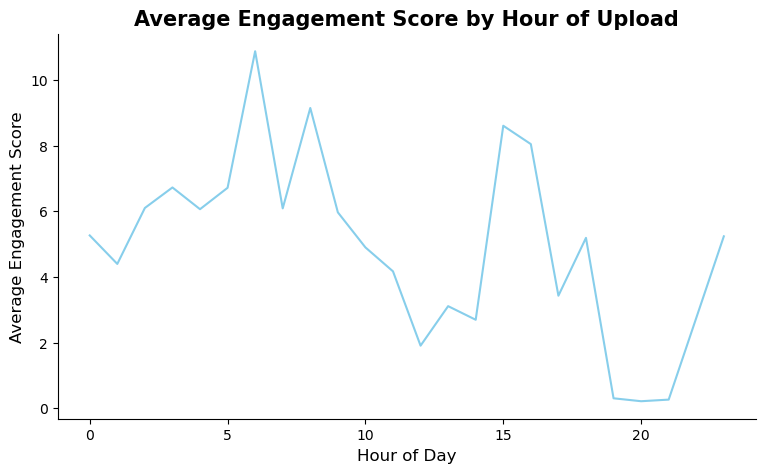

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15784\2410872694.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='upload_month', y='engagement_score', data=YT_df, ci=None, color='coral')


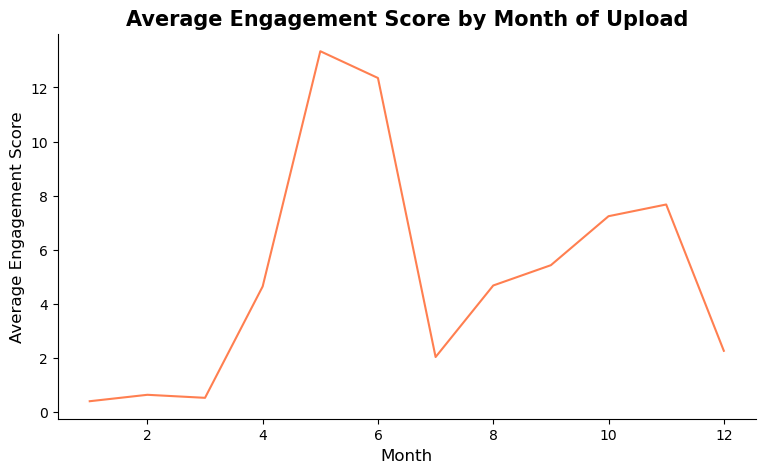

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15784\2410872694.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='upload_day', y='engagement_score', data=YT_df, ci=None, color='lightgreen')


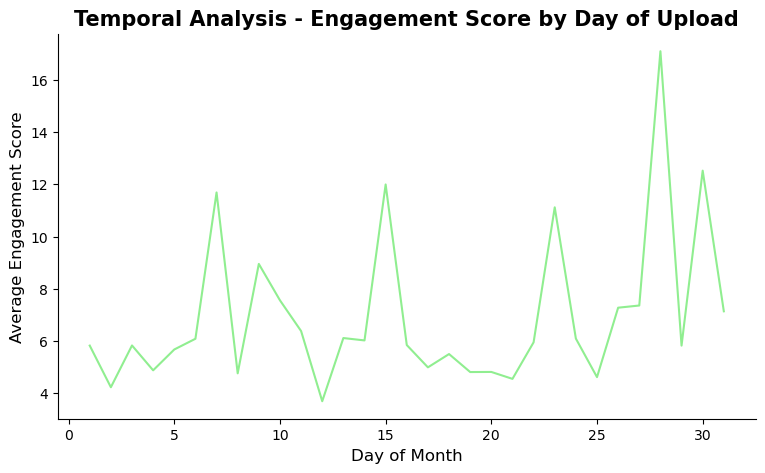

In [64]:
# Code for line chart for Average Engagement Score by Hour of Upload
plt.figure(figsize=(9, 5))
sns.lineplot(x='upload_hour', y='engagement_score', data=YT_df, ci=None, color='skyblue')
plt.title('Average Engagement Score by Hour of Upload', fontsize=15, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

# Code for line chart for Average Engagement Score by Month of Upload
plt.figure(figsize=(9, 5))
sns.lineplot(x='upload_month', y='engagement_score', data=YT_df, ci=None, color='coral')
plt.title('Average Engagement Score by Month of Upload', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

# Code for line chart for temporal analysis (Day of Upload)
plt.figure(figsize=(9, 5))
sns.lineplot(x='upload_day', y='engagement_score', data=YT_df, ci=None, color='lightgreen')
plt.title('Temporal Analysis - Engagement Score by Day of Upload', fontsize=15, fontweight='bold')
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

#### Insights: 

The first line chart show us that that videos posted in UTC late afternoon to early evening hours garner higher engagement.  The second graph shows us that videos posted in mid-year months, especially June, achieving significantly higher engagement scores. The third line chart indicates that certain days of the month, particularly in the latter half, tend to have higher engagement. 

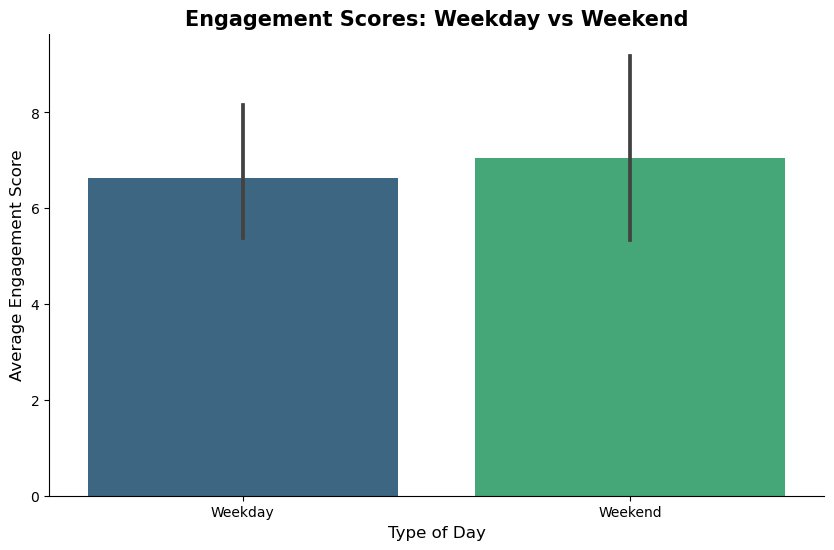

In [65]:
# Mapping 'is_weekend' to 'Weekday' and 'Weekend'
YT_df['weekend_weekday'] = YT_df['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='weekend_weekday', y='engagement_score', data=YT_df, palette='viridis')
plt.title('Engagement Scores: Weekday vs Weekend', fontsize=15, fontweight='bold')
plt.xlabel('Type of Day', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

#### Insights

Weekend uploads achieve higher engagement compared to weekdays, suggesting optimal release timing.

# Frequency of Uploads Analysis:

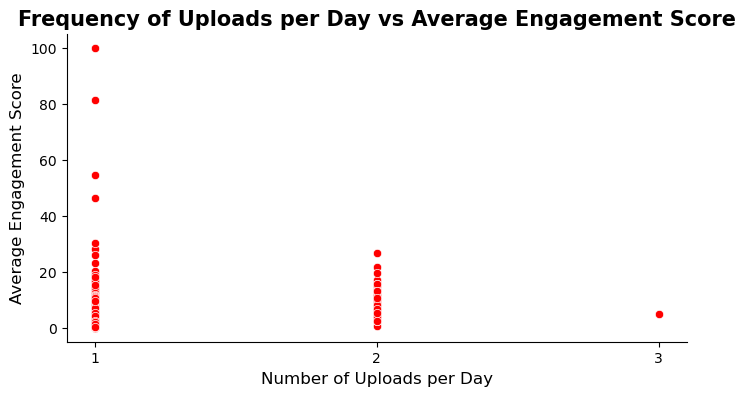

In [66]:
# Extract the date from 'upload_date' to create a new column for the upload date
YT_df['upload_date_only'] = YT_df['upload_date'].dt.date

# Calculate the number of uploads per day
uploads_per_day = YT_df.groupby('upload_date_only').size().reset_index(name='num_uploads')

# Calculate the average engagement score for each day
average_engagement_per_day = YT_df.groupby('upload_date_only')['engagement_score'].mean().reset_index()

# Merge the two dataframes
merged_df = pd.merge(uploads_per_day, average_engagement_per_day, on='upload_date_only')

# Plotting
plt.figure(figsize=(8, 4))
sns.scatterplot(x='num_uploads', y='engagement_score', data=merged_df, color='red')
plt.title('Frequency of Uploads per Day vs Average Engagement Score', fontsize=15, fontweight='bold')
plt.xlabel('Number of Uploads per Day', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(range(1, merged_df['num_uploads'].max() + 1), fontsize=10)  # Set x-axis ticks to show each number
plt.yticks(fontsize=10)
sns.despine()
plt.show()

#### Insights:

From the graph, it appears that a higher frequency of daily uploads does not necessarily correlate with increased average engagement scores, suggesting that factors other than upload frequency might play a more significant role in driving engagement.

## Length of Title and Description Analysis

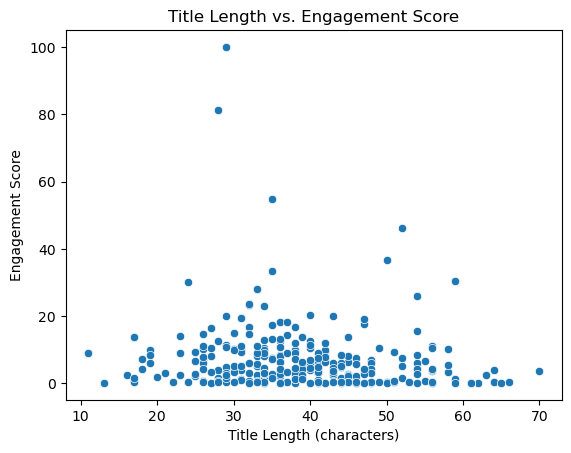

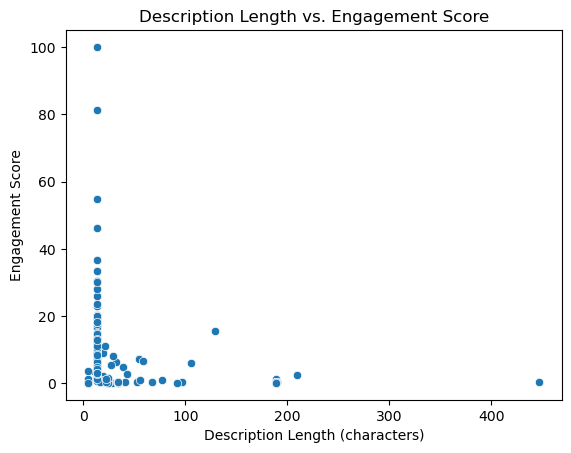

In [67]:
# Scatter Plot for Title Length vs Engagement Score
sns.scatterplot(x='title_length', y='engagement_score', data=YT_df)
plt.title('Title Length vs. Engagement Score')
plt.xlabel('Title Length (characters)')
plt.ylabel('Engagement Score')
plt.show()

# Scatter Plot for Description Length vs Engagement Score
sns.scatterplot(x='description_length', y='engagement_score', data=YT_df)
plt.title('Description Length vs. Engagement Score')
plt.xlabel('Description Length (characters)')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

In the title length versus engagement score scatter plot, there is no clear trend linking title length to engagement, with high engagement scores spread across various title lengths. Some titles around 30-40 characters show higher engagement scores.

For the description length versus engagement score, the data suggests that very short descriptions are not associated with the highest engagement. Instead, a moderate description length appears to be linked with higher engagement, but excessively long descriptions do not necessarily correlate with increased engagement.

## Analysis of Like and Comment Ratios

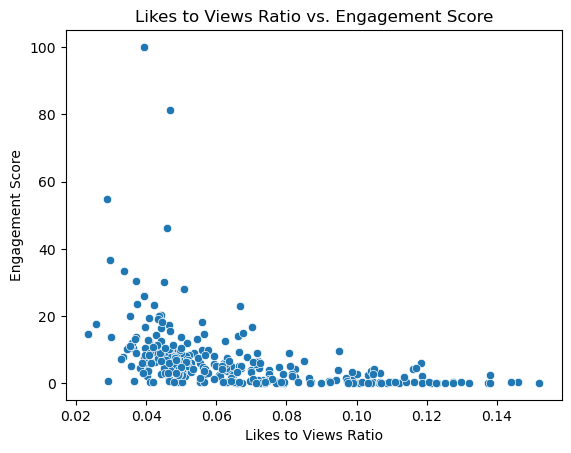

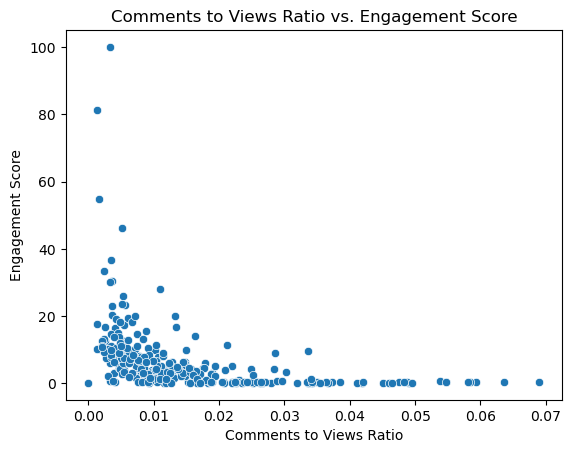

In [68]:
# Scatter Plot for Likes to Views Ratio vs Engagement Score
sns.scatterplot(x='likes_to_views_ratio', y='engagement_score', data=YT_df)
plt.title('Likes to Views Ratio vs. Engagement Score')
plt.xlabel('Likes to Views Ratio')
plt.ylabel('Engagement Score')
plt.show()

# Scatter Plot for Comments to Views Ratio vs Engagement Score
sns.scatterplot(x='comments_to_views_ratio', y='engagement_score', data=YT_df)
plt.title('Comments to Views Ratio vs. Engagement Score')
plt.xlabel('Comments to Views Ratio')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

The scatter plots shows us that that a higher likes-to-views ratio or comments-to-views ratio does not always mean higher engagement scores. Most videos cluster at lower ratios and engagement scores, with outliers indicating that only a select few achieve high engagement through a combination of likes or comments relative to views. 

## Analysis of Average View Duration

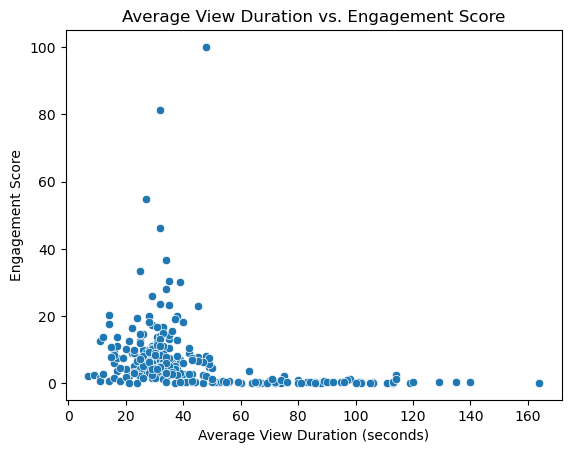

In [69]:
# Scatter Plot for Average View Duration vs Engagement Score
sns.scatterplot(x='average_view_duration', y='engagement_score', data=YT_df)
plt.title('Average View Duration vs. Engagement Score')
plt.xlabel('Average View Duration (seconds)')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

The scatter plot shows us that videos with a moderate average view duration tend to have higher engagement scores, suggesting an optimal length for viewer retention and engagement. However, the highest engagement does not necessarily correlate with the longest view duration, meaning that beyond a certain point, additional viewing time does not equate to increased engagement.

## Video Definition (HD/SD) Analysis

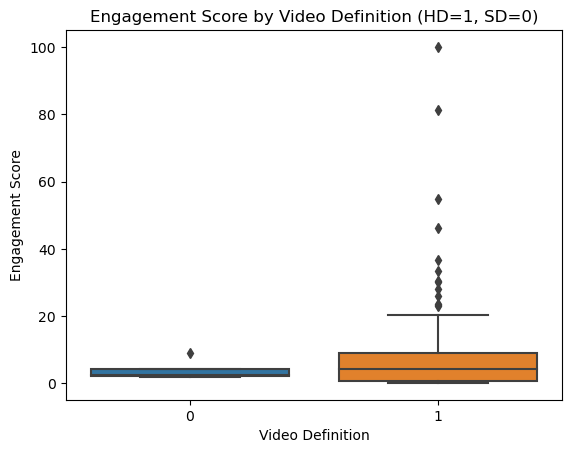

In [70]:
# Boxplot for Engagement Score by Video Definition
sns.boxplot(x='definition_numeric', y='engagement_score', data=YT_df)
plt.title('Engagement Score by Video Definition (HD=1, SD=0)')
plt.xlabel('Video Definition')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

The boxplot shows us that high-definition (HD) videos have higher engagement score in comparision to standard-definition (SD). Since it's a gaming channel, viewers prefer watching high qaulity gaming content. 

## Analysis of Video Length Categories

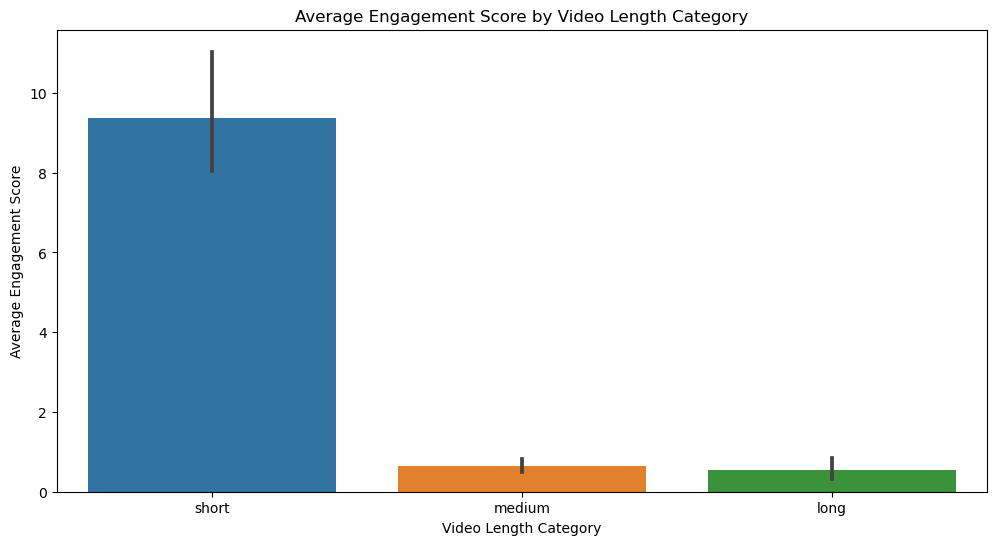

In [71]:
# Average Engagement Score by Video Length Category
plt.figure(figsize=(12, 6))
sns.barplot(x='duration_category', y='engagement_score', data=YT_df)
plt.title('Average Engagement Score by Video Length Category')
plt.xlabel('Video Length Category')
plt.ylabel('Average Engagement Score')
plt.show()

#### Insights: 

This graph shows us that this channel has succeded so far uploading short videos suggesting that concise content may be more effective at capturing audience attention. 

## Comparison of Average Duration in High and Low Engagement Videos

In [72]:
# Creating subsets for High and Low engagement videos
high_engagement_videos = YT_df[YT_df['engagement_category'] == 'High']
low_engagement_videos = YT_df[YT_df['engagement_category'] == 'Low']

# Comparing average duration for High and Low engagement videos
avg_duration_high = high_engagement_videos['duration'].mean()
avg_duration_low = low_engagement_videos['duration'].mean()

print(f"Average Duration - High Engagement: {avg_duration_high}, Low Engagement: {avg_duration_low}")

Average Duration - High Engagement: 38.9, Low Engagement: 117.05238095238096


#### Insights:

Future optimal video length should be approx 40 seconds. 

## Sentiment Analysis of Comments

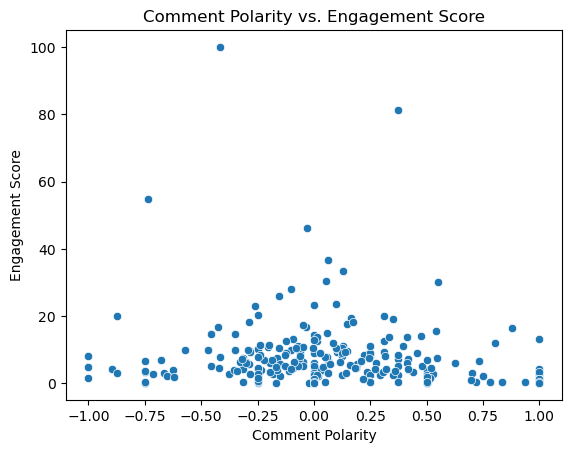

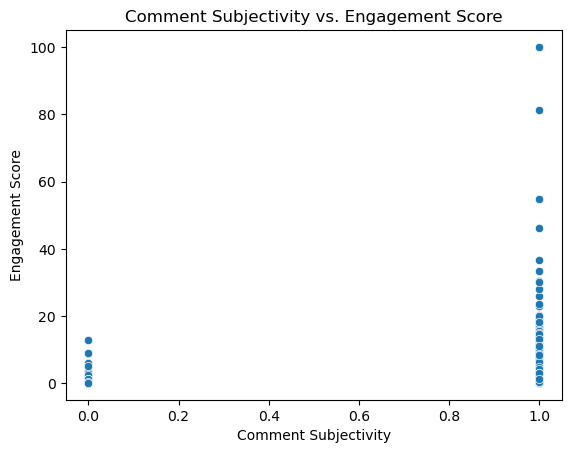

In [73]:
# Merge 'engagement_score' from YT_df into comments_df
merged_df = pd.merge(comments_df, YT_df[['video_id', 'engagement_score']], on='video_id', how='left')

# Now create the scatter plot
sns.scatterplot(x='comments_polarity', y='engagement_score', data=merged_df)
plt.title('Comment Polarity vs. Engagement Score')
plt.xlabel('Comment Polarity')
plt.ylabel('Engagement Score')
plt.show()

# Scatter Plot for Comment Subjectivity vs Engagement Score
sns.scatterplot(x='comments_subjectivity', y='engagement_score', data=merged_df)
plt.title('Comment Subjectivity vs. Engagement Score')
plt.xlabel('Comment Subjectivity')
plt.ylabel('Engagement Score')
plt.show()

#### Insights: 

For the first scatter plot (Comment Polarity vs. Engagement Score):
The plot shows no strong correlation between comment polarity and engagement scores, indicating that neither positive nor negative sentiment consistently affects engagement.

For the second scatter plot (Comment Subjectivity vs. Engagement Score):
The data points cluster at lower levels of engagement regardless of comment subjectivity. High engagement videos tend to have a range of subjectivity scores, suggesting content that attracts both factual and opinion-based reactions might be engaging.

## Analysis of Keyword Impact on Engagement Score

Performing Keyword Frequency Analysis which identifies the most frequent keywords (in high and low engagement videos).

#### Keyword Frequency Analysis

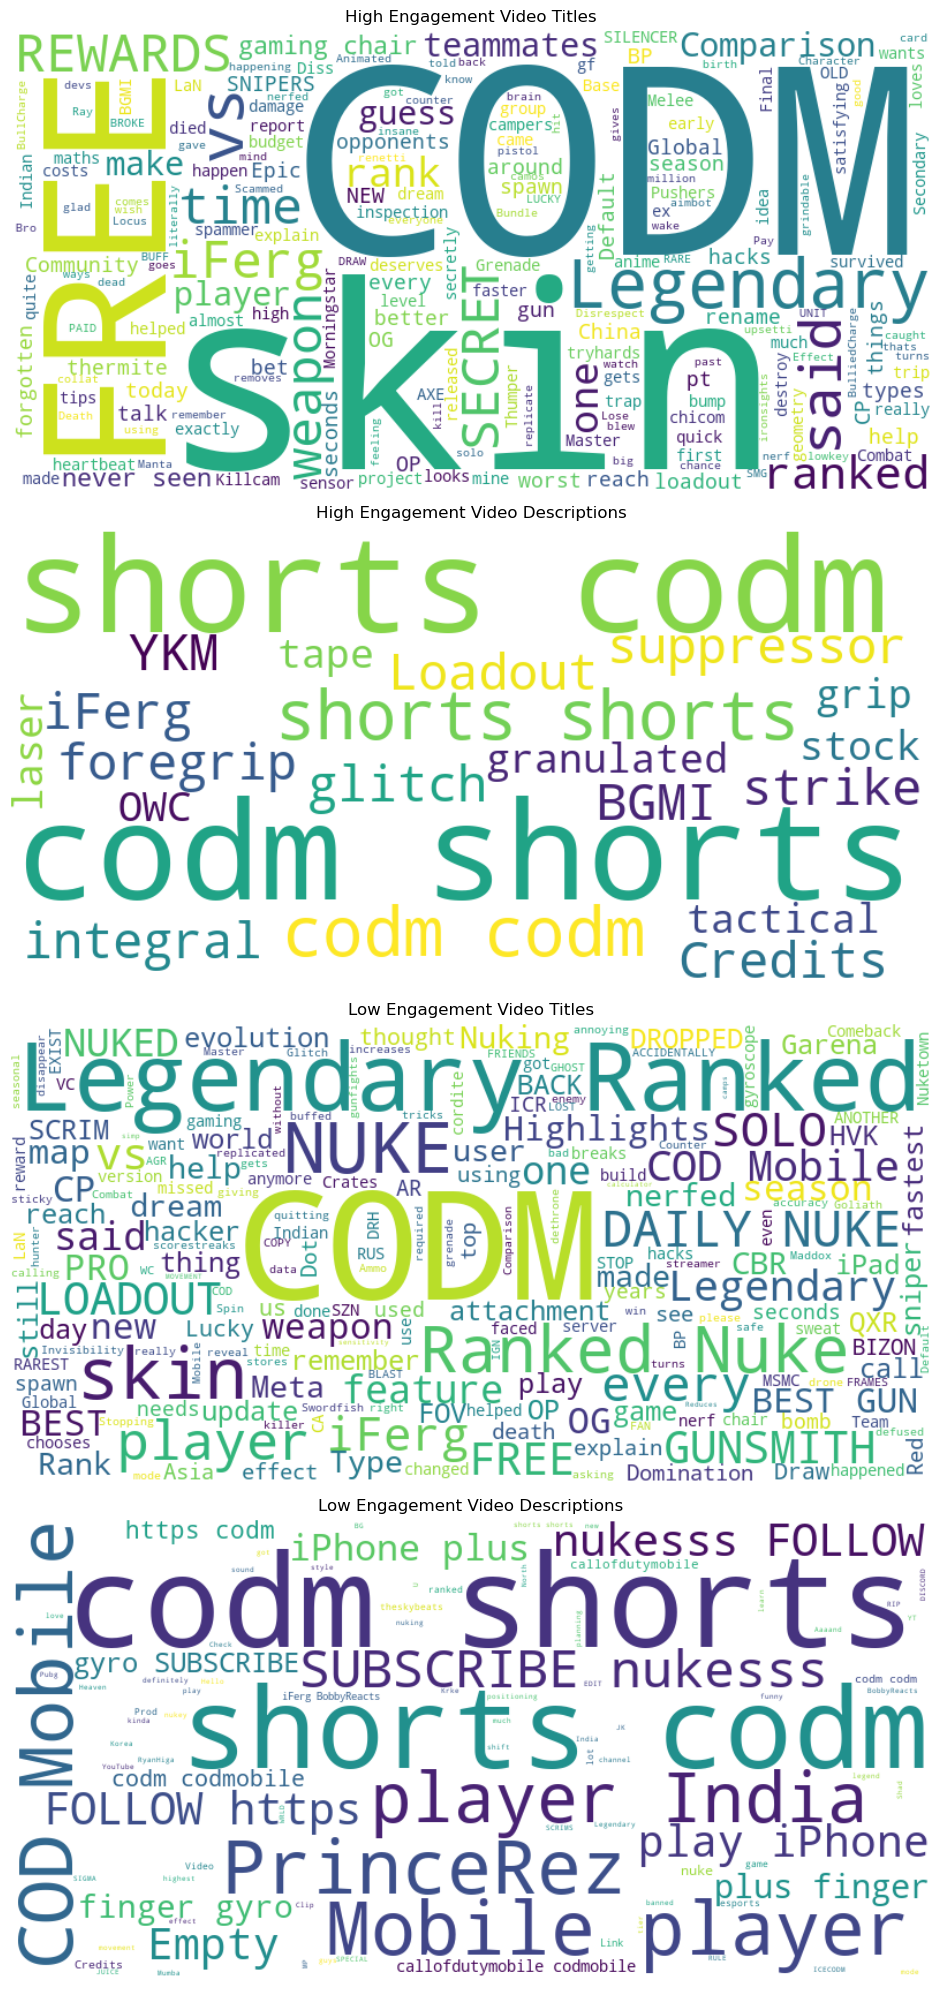

In [74]:
# Splitting the DataFrame into high and low engagement DataFrames
high_engagement_df = YT_df[YT_df['engagement_category'] == 'High']
low_engagement_df = YT_df[YT_df['engagement_category'] == 'Low']

# Function to create word clouds
def create_wordcloud(text, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Create a subplot for each word cloud
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# High Engagement - Titles
high_engagement_titles = ' '.join(high_engagement_df['title_keywords_str'].tolist())
create_wordcloud(high_engagement_titles, 'High Engagement Video Titles', axs[0])

# High Engagement - Descriptions
high_engagement_descriptions = ' '.join(high_engagement_df['description_keywords_str'].tolist())
create_wordcloud(high_engagement_descriptions, 'High Engagement Video Descriptions', axs[1])

# Low Engagement - Titles
low_engagement_titles = ' '.join(low_engagement_df['title_keywords_str'].tolist())
create_wordcloud(low_engagement_titles, 'Low Engagement Video Titles', axs[2])

# Low Engagement - Descriptions
low_engagement_descriptions = ' '.join(low_engagement_df['description_keywords_str'].tolist())
create_wordcloud(low_engagement_descriptions, 'Low Engagement Video Descriptions', axs[3])

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights: 

The word clouds for high engagement video titles and descriptions show frequent use of impactful words like SECRET, FREE, REWARDS, iFerg (the most successful content creator of codm - call of duty mobile), CODM (Game name), Legendary and Skin (different skin series), which attracts viewers. 
In contrast, low engagement titles and descriptions have terms like NUKE (NUKE series), Ranked, DAILY and player -> these words should not be avoided completely as, when these words were used, the video lengths were higher, so instead, we should not rely completely on this but should get an idea from the high engagment video keyword frequency.  
Additionally, "CODM" and "shorts" appear  across all categories meaning that having this in the description pushes the video to the right type of people. 

In [75]:
YT_df.dtypes

video_id                                 object
title                                    object
description                              object
upload_date                 datetime64[ns, UTC]
duration                                  int32
view_count                                int64
like_count                                int64
comment_count                             int32
definition                               object
average_view_duration                     int64
subscribers_gained                        int64
subscribers_lost                          int64
upload_hour                               int32
upload_day                                int32
upload_month                              int32
upload_year                               int32
day_of_week                               int32
is_weekend                                int64
duration_category                      category
likes_to_views_ratio                    float64
comments_to_views_ratio                 

In [77]:
YT_df.to_pickle('YTData.pkl')